In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
%matplotlib inline

In [8]:
org = ["aws","facebook","google","naver","kakao","apple","alibaba","tencent","baidu","microsoft","samsung"]
df = pd.read_excel("{}.xlsx".format(org[0]))


,ProjectName,BranchNum,PullRequestNum,CommitNum,StarNum,Topics,ReleaseInfo
0,aws-parallelcluster-cookbook,23,11,"1,405",76,[],AWS ParallelCluster v3.0.0
1,amazon-genomics-cli,10,7,64,30,[],Release v1.0.1
2,copilot-cli,5,4,"2,177",1.8k,"['devops', 'containers', 'developer-tools', 'i...",copilot-cli: Release v1.11.0
3,aws-parallelcluster,25,24,"3,627",645,[],AWS ParallelCluster v3.0.0
4,aws-encryption-sdk-java,6,3,284,176,[],AWS Encryption SDK 2.3.3 Release -- 2021-09-01
...,...,...,...,...,...,...,...
296,aws-iot-device-sdk-arduino-yun,1,1,24,154,[],v2.2.0
297,amazon-ecs-cluster-state-service,1,1,9,14,[],NaN
298,mit-0,1,0,1,73,[],NaN
299,aws-eb-python-dockerfiles,1,1,1,60,[],NaN


In [473]:
# df = pd.read_excel("Topics_stars10000_project_keyword.xlsx") #star>10000개가 있는 Df
df = pd.read_excel("Topics_Vehicle.xlsx")   # vehicle Data가 들은 Df
df.drop_duplicates(['project_name'])
df.head(50)

,project_name,topic_keyword
0,fr3ts0n/AndrOBD,"['android', 'plugin', 'mqtt', 'chart', 'transl..."
1,pageauc/speed-camera,"['python', 'windows', 'opencv', 'unix', 'webse..."
2,Seeed-Studio/Seeed_Arduino_CAN,"['obd', 'vehicle', 'can-bus']"
3,parkingwang/vehicle-keyboard-android,"['keyboard', 'vehicle', 'plate-number', 'vpl',..."
4,cedricp/ddt4all,"['vehicle', 'can-bus', 'elm327', 'obd2', 'ecu']"
5,stuntrally/stuntrally,"['game', 'editor', 'windows', 'linux', 'car', ..."
6,layumi/AICIty-reID-2020,"['pytorch', 'vehicle', 'paddlepaddle', 'vehicl..."
7,rnd-ash/OpenVehicleDiag,"['rust', 'protocol', 'hacking', 'diagnostics',..."
8,atiksoftware/pubg_mobile_memory_hacking_examples,"['library', 'mobile', 'cpu', 'hack', 'memory',..."
9,rohanchandra30/Spectral-Trajectory-and-Behavio...,"['graph', 'traffic', 'prediction', 'vehicle', ..."


In [431]:
# for i in topic_dic:
#     if 'active' in i[0]:
#         print("'{}'".format(i[0]),end=",")

In [474]:
# topic_dic[1500:]

In [475]:
# 비슷한 토픽끼리는 하나의 칼럼이 될 수 있도록 일일히 비슷한 토픽끼리 묶는 작업을 하였음
target = ['machinelearning','package','zsh','zerossl','youtube','xcode','x64','wysiwyg','workflow','windows','weixin','wechat','web','vue',
         'vpn','vision','vim','vedio','version','util','ui','typescript','twitter','touch','test','terminal','tensorflow',
         'telegram','task','system','swift','swagger','svg','style','static','state','ssh','sql','spring','sort','software',
         'snippets','server','security','search','scikit-learn','rfc','rest','redis','react','queue','pytorch','python','protoc','progress',
         'programming','posix','php','performance','openwrt','note','nodejs','neural','nlp','monitoring','microservice','material','macos','linux',
          'leetcode','language','kotlin','json','javascript','ios','interview','http','html','headless','graphql','git','frontend','font','flutter',
          'firefox','file','face-swap','docker','distributed','design','deep-learning','data','css','cloud','chrome','automation','api','angular',
          'android','algorithm','pull-request', 'public','pixi','open-source','object-detection','multi-platform','mini','low-code','localstorage','loading',
          'kubernetes','koa','image','humans','game','free','detection','drag','document','devops','dashboard','crypto','cpp','continuous-delivery','command','cheatsheet',
          'certificate','business','build','bootstrap','awesome','audio','apple','apache','ansi','animation','alibaba','admin','activejob'
         ]



string_list = [['machinelearning-python','ml','machine-translation','machine-learning-from-scratch','machine-learning-algorithms','machine-learning'],['packages','package-manager','packaging'],['zsh-theme','zsh-prompt','zsh-configuration','zsh-autosuggestions'],['zero-copy','zero-configuration'],['youtube-live'],['xcode10'],['x86-64','x86'],['wysiwyg-editor'],
               ['workflow-automation','works-with-clojurescript','works-with-codespaces','works-with-construct','works-with-elm','works-with-flutter','works-with-gatsby','works-with-mint','works-with-phaser','works-with-react','works-with-reason','works-with-svelte','works-with-vue','works-with-yew'],
               ['windowing','windows-10','windows-console','windows-terminal','windowscontainers'],['weixin-plugin'],['wechat-macos','wechat-mini-program','wechat-plugin','wechat-weapp'],
               ['webxr','webworkers','webview','webtorrent','webstorm','websql','websockets','websocket-server','websocket-compression','websocket-client','websocket','website','webservices','webscraping','webrtc','webpack5','webpack4','webpack2','webpack','webp','webm','webgpu','webgl2','webgl','webframework','webfont','webfinger','webdriver','webdevelopment','webdav','webcomponents','webbrowser','webaudio','webassembly','webapp','webapi','web-terminal','web-server','web-performance','web-framework','web-development','web-components','web-clipper','web-audio','web-application-framework','web-application','web-app','web','sdwebimage','react-native-web','node-webkit','mobile-web','ipfs-web'],
               ['vuex','vuetifyjs','vuetify','vuepress','vuejs3','vuejs2','vuejs','vue3','vue2','vue-router','vue-material','vue-components','vue-component','vue-cli','vue-admin','ant-design-vue'],
               ['vpn-server','vpn-client'],['visual-studio','visualizer','visualizations','visualization','visual-studio-code-theme','visual-studio-code-extension','visual-studio-code','visual-studio','data-visualization'],
               ['vimrc','vimeo','vim-plugins','vim-plugin','vim-distribution','vim-configuration','vim'],['videojs','videocache','video-recording','video-player','video-conferencing','video-communication','video','scalable-video-conferences','html5-video','explanatory-math-videos','deep-video','3b1b-videos'],
               ['versioning','version-manager'],['utils','utility-classes','utilities'],['ui-library','ui-kit','ui-design','ui-components','redis-gui-client','gui-framework','gui-app'],
               ['typescript-playground','typescript-framework','typescript-definitions','typescript'],['twitter-streaming','twitter-cards','twitter','tweet'],
               ['touchscreen','touch-events','touch'],['unit-testing','tests','testing-tools','testing','test-suite','test-runners','test-runner','test-framework','test-automation','performance-testing','pentesting-windows','pentesting','pentesters','pentest','penetration-testing','painless-javascript-testing','load-testing','javascript-tests','interview-test','end-to-end-testing','e2e-tests','e2e-testing','api-testing','api-test'],
               ['windows-terminal','web-terminal','terminals','terminal-themes','terminal-schemes','terminal-emulators','terminal-color','terminal','osx-terminal-themes','lxterminal'],
               ['tensorflow-lite','tensorflow','tensor'],['telegram-solution','telegram-desktop'],['task-scheduler','task-runner','task-manager'],
               ['systems-science','systems','system-design','system','recommendedsystem','operating-system','management-system','fuse-filesystem','filesystem','embedded-systems','distributed-systems','design-systems','design-system','database-systems','content-management-system','build-system'],
               ['swiftyjson','swiftui','swiftpm','swift4-2','swift-programming','swift-package-manager','swift-library','swift-language','swift-framework','swift-extensions','swift','server-side-swift','rxswift','reactiveswift','openstack-swift','json-parsing-swift','ios-swift','awesome-swift','apple-swift'],
               ['swagger2','swagger-ui','swagger-js','swagger-api'],['svgo','svg-sprites','svg-path','svg-icons'],['stylesheets','stylesheet-language','styleguide','styled-components','style-linter','style-guide'],
               ['static-site-generator','static-code-analysis','static-analysis'],['statechart','state-tree','state-management','state-machine'],
               ['ssh-tunnel','ssh-server','ssh-agent'],['websql','sqlserver','sqlmap','sqlite','sql-server','sql-injection','sql-editor','sql','spark-sql','postgresql','nosql','mysql-compatibility','mysql','mssql','microsoft-sql-server'],
               ['springs','springmvc','springcloud-config','springcloud','springbootadmin','springboot-shiro','springboot','spring-session','spring-security','spring-physics','spring-framework','spring-data-jpa','spring-cloud-core','spring-cloud-alibaba','spring-cloud','spring-cache','spring-boot-upload-file','spring-boot-mongodb','spring-boot-mail','spring-boot-learning','spring-boot-examples','spring-boot-demo','spring-boot-2','spring-boot','spring','react-spring'],
               ['sorts','sorting-algorithms','sortable'],['software-engineering','software-engineer','software-development','software-analysis'],
               ['snippets-library','snippets-collection','snippets'],['websocket-server','web-server','vpn-server','ssh-server','sqlserver','sql-server','serverless-functions','serverless-framework','serverless-architectures','serverless','server-side-swift','server-side-rendering','server-rendering','server','parse-server','observer','microsoft-sql-server','jumpserver','http-server','graphql-server','dns-server','dhcp-server','dev-server','api-server'],
               ['spring-security','security-researchers','security-checklist','security-book','security','macos-security','macbook-security','docker-security','application-security'],
               ['site-search','silver-searcher','security-researchers','searches','search-in-text','search-engines','search-engine','search','research','jobsearch','jobs-search','hyperparameter-search','entreprise-search','elasticsearch','distributed-search-engine'],
               ['scikit-learn-python','scikit-learn'],['rfc-8259','rfc-7159','rfc-7049','rfc-6902','rfc-6901','rfc-6455'],['restful-api','restful','rest-api','rest','postgrest','api-rest','admin-on-rest'],
               ['redis-gui-client','redis-gui','redis-cluster','redis-client'],['works-with-react','reactjs','reactivex','reactiveui','reactiveswift','reactivecocoa','reactive-streams','reactive-programming','reactive','react16','react-tutorial','react-spring','react-router','react-navigation','react-native-web','react-native','react-interview-questions','react-hooks','react-components','react-component','react-boilerplate','react-apps','react-admin'],
               ['sqs-queue','queued-jobs','queue-workers','queue-tasks','queue','message-queue'],['pytorch-tutorial','pytorch-transformers'],['scikit-learn-python','python3','python-types','python-resources','python-requests','python-library','python-interview-questions','python-framework','python-cheatsheet','python-3','python','progress-bar-python'],
               ['protocol-compiler','protocol-buffers','protocol','protoc','ipfs-protocol','homekit-accessory-protocol','acme-protocol'],['progressmeter','progressbar','progress-bar-python','progress-bar'],['swift-programming','reactive-programming','programming-tutorial','programming-ligatures','programming-language','programming-interviews','programming-blogs','programming','programmer','javascript-programming','functional-programming','dynamic-programming-algorithm','dynamic-programming','concurrent-programming','competitive-programming'],
               ['posix-sh','posix-compliant-flags','posix-compliant'],['phpunit','phpstorm','phpmailer','php8','php7','php-library','php-installation','php-framework','php-applications','php','modern-php','designpatternsphp'],
               ['web-performance','performance-testing','performance-metrics','performance-analysis','performance','high-performance','best-performance'],
               ['openwrt-zh-cn','openwrt-shadowsocksr-libev-full','openwrt-package','openwrt-feed'],['notes','notebooks','notebook','note','jupyter-notebook','evernote'],['nodemon','nodejs-framework','nodejs-development','nodejs','node-webkit','node-module','node-js','node-framework','node'],
               ['neural-networks','neural-network','neural-nets','deep-neural-networks'],['natural-language-understanding','natural-language-processing','natural-language-generation','nlp-tasks','nlp-library'],['monitoring','monitor','error-monitoring','docker-monitoring'],
               ['polyglot-microservices','microservices-architecture','microservices'],['vue-material','training-materials','material-ui','material-theme','material-design-lite','material-design-for-bootstrap','material-design','material-components','material','bootstrap-material','angularjs-material'],
               ['wechat-macos','macosx','macos-setup','macos-security','macos-application'],['ubuntu-linux','linux-resource','linux-kernel','linux-insides','linux-desktop','linux-command','linux-app'],
               ['leetcode-solutions','leetcode-questions','leetcode-java','leetcode-golang','leetcode-go','leetcode-c'],['swift-language','stylesheet-language','ruby-language','programming-language','natural-language-understanding','natural-language-processing','natural-language-generation','multi-language','language-models','language-model','language-grammars','language-client','language','julia-language','esoteric-language'],
               ['kotlin-library','kotlin-android'],['ubjson','swiftyjson','json-serializer','json-serialization','json-schema','json-pointer','json-patch','json-parsing-swift','json-parsing-library','json-parser','json-merge-patch','json-diff','json','fastjson'],['painless-javascript-testing','javascript-tests','javascript-programming','javascript-motion-engine','javascript-modules','javascript-library','javascript-interview-questions','javascript-framework','javascript-engines','javascript-engine','javascript-compiler','javascript-closures','javascript-best-practices','javascript-applications','javascript-algorithms','javascript','es6-javascript','js-questions','js-ipfs','js'],
               ['ios-transition','ios-swift','ios-libraries','ios-lib','ios-framework','ios-animation'],['technical-coding-interview','react-interview-questions','rails-interview','python-interview-questions','programming-interviews','javascript-interview-questions','interviews','interviewing','interview-test','interview-questions','interview-preparation','interview-prep','interview-practice','interview','frontend-interview','front-end-interview','fe-interview','coding-interviews','coding-interview','angularjs-interview-questions','android-interview-questions'],
               ['httpurlresponse','https','httpie','httpclient','http2','http-server','http-proxy','http-client','http','automatic-https'],['htmlparser2','htmlparser','html5-video','html5-games','html5-game-development','html5-charts','html5-canvas','html5-boilerplate','html5-audio','html5','html-template','html-questions'],['headless-cms','headless-chrome','headless-browser'],
               ['graphql-server','graphql-relay','graphql-js','graphql-client','graphql-api','graphql','apollographql'],['hellogithub','gitops','gitlab','gitignore','github-pages','github-gist','github-api-v4','github-api','github-actions','github','gitea','gitbook','git'],['frontend-roadmap','frontend-interview','frontend-framework','frontend-development','frontend','front-end-interview','front-end-development','front-end-developer-tool','front-end'],
               ['webfont','variable-fonts','ttf-fonts','patched-fonts','opentype-fonts','iconic-fonts','icon-font','fonts','fontawesome','font-awesome'],['works-with-flutter','flutter-plugins','flutter-plugin','flutter-examples','flutter-doc','flutter-demo','flutter-apps'],['firefox-extension','firefox-addon'],['filesystem','files','file-uploads','file-uploader','file-upload','file-storage','file-sharing','file-manager','file-management'],
               ['openfaceswap','faceswap','face-swap','face-recognition','face-images','face-detection','deepfacelab','deepface','deep-face-swap'],['dockerfile','docker-ui','docker-swarm','docker-security','docker-registry','docker-monitoring','docker-machine','docker-image','docker-environment','docker-deployment','docker-container','docker-composer','docker-compose','docker-api'],['distributed-transactions','distributed-transaction','distributed-training','distributed-tracing','distributed-systems','distributed-search-engine','distributed-messaging','distributed-locks','distributed-database','distributed-configuration','distributed'],
               ['ui-design','system-design','material-design-lite','material-design-for-bootstrap','material-design','designpatternsphp','design-tools','design-systems','design-system','design-patterns-for-humans','design-patterns','design-pattern','design','api-design','ant-design-vue','ant-design'],['deepspeech','deeplearning','deepfakes','deepfacelab','deepface','deep-video','deep-reinforcement-learning','deep-neural-networks','deep-networks','deep-learning-tutorial','deep-learning','deep-io','deep-face-swap','creating-deepfakes'],['datasets','datamatrix','datamapper','datagrip','databricks','databases','database-systems','database-gui','database','data-viz','data-visualization','data-structures','data-structure','data-scientists','data-science','data-mining','data-mapper','data-flow','data-fetching','data-engineering','data-consistency','data-analytics','data-analysis'],
               ['functional-css','csse','css3-features','css3','css-tricks','css-reset','css-questions','css-in-js','css-framework','css-effects','css-animations'],['springcloud-config','springcloud','spring-cloud-core','spring-cloud-alibaba','spring-cloud','private-cloud','nextcloud','neteasecloud','google-cloud-storage','google-cloud-functions','cloudstorage','cloudnative','cloudmusic','cloudflare','cloud-storage','cloud-native','cloud-management','cloud-computing'],['headless-chrome','chrome-extensions','chrome-extension','chrome-devtools'],['zsh-autosuggestions','workflow-automation','test-automation','home-automation','build-automation','autosuggest','autopep8','autonomy','autonomous-vehicles','autonomous-driving','automl','automation','automatic-https','automatic-api','automated','autolayout','autograd','autocompletion','autocomplete','auto'],
               ['webscraping','webapi','swagger-api','strapi','scraping','restful-api','rest-api','public-apis','openapi3','openapi-specification','openapi','homekit-api','hapi','graphql-api','github-api-v4','github-api','fastapi','dom-apis','docker-api','automatic-api','apis','api-testing','api-test','api-server','api-rest','api-manager','api-management','api-gateway','api-documentation','api-design','api-client'],['angularjs-material','angularjs-interview-questions','angularjs','angular9','angular2','angular10','angular-dashboard-template','angular-components','angular-cli'],['mpandroidchart','kotlin-android','androidx','android-ui','android-studio','android-library','android-interview-questions','android-development','android-architecture'],
               ['sorting-algorithms','machine-learning-algorithms','javascript-algorithms','genetic-algorithm','dynamic-programming-algorithm','algorithms-implemented','algorithms-datastructures','algorithms-and-data-structures','algorithms','algorithm-competitions','algorithm-challenges'],
               ['pulltorefresh','pull-to-refresh','pull-request-review'],['public-trackers','public-tracker','public-key-pinning'],['pixiv','pixijs'],['openwrt','openvpn','openssl','opensource','openpose','opengl','opendata','opencv','openconnect','open-telemetry','open-source-project'],['objectstorage','objective-c-library','objective-c','object-storage','object-oriented'],['multithreading','multimedia','multiformats','multiboot','multi-platform','multi-person'],['miniprogram','minimalist','minikube','minify','minifier','minification','miniapp'],['low-code-plattform','low-code-development-platform','low-code'],
               ['localstack','localhost','localforage','local-development'],['loading','loaders','load-generator','load-balancer'],['kubernetes-ingress-controller','kubernetes-ingress'],['koa2','koa-middleware'],['imageloader','image-processor','image-processing','image-annotation'],['human-pose-estimation','human-pose','human-behavior-understanding','forhumans'],['puzzle-game','platform-game','not-the-game','games','gamedev','game-frameworks','game-engine','game-development','game-capture','game','facebook-instant-games'],['freeware-icon','freegate','freecodecamp','freebsd-vt','free-ssr','free-ss','free-software','free-fanqiang'],['object-detection','keypoint-detection','intrusion-detection','feature-detection'],['dragging','draggable','drag-drop','drag-and-drop'],['documentation-tool','documentation'],['devops-roadmap'],
                ['hystrix-dashboard','dashboards','dashboard-templates','dashboard','admin-dashboard'],['cryptography','cryptocurrency'],['cpplint','cppcon','cpp11','cpp-library'],['continuous-integration','continuous-deployment'],['subcommands','commandline','command-line-tool','command-line','command-cobra'],['cheatsheets'],
               ['certification','certificates','certificate-pinning'],['businessintelligence','business-intelligence','business-analytics'],['form-builder','buildpack','build-tools','build-tool','build-pipelines'],['secure-boot','multiboot','jeecgboot','jeecg-boot','bootstrap5','bootstrap4-theme','bootstrap4','bootstrap','bootable-usb'],['awesomeness','awesome-public-datasets','awesome-lists','awesome-list'],['audio-processing','audio-library'],['apple-watch','apple-tv','apple'],['apache-superset','apache-airflow'],['strip-ansi','ansible','ansi-escape-codes','ansi-colors','ansi'],['transition-animation','recyclerview-item-animation','animations','animation-library'],['alibaba-oss','alibaba-middleware'],['ngx-admin','ng2-admin','eladmin','adminpanel','admin-ui','admin-template','admin-panel','admin-dashboard'],
               ['activerecord','activemq','activejob','active-record']
                
              ]
print(len(target),len(string_list))
def same_things(string):
    for idx,i in enumerate(string_list):
        if string in i:
            string = target[idx]    
    return string

for i in range(len(target)):
    print(target[i],string_list[i])

139 139
machinelearning ['machinelearning-python', 'ml', 'machine-translation', 'machine-learning-from-scratch', 'machine-learning-algorithms', 'machine-learning']
package ['packages', 'package-manager', 'packaging']
zsh ['zsh-theme', 'zsh-prompt', 'zsh-configuration', 'zsh-autosuggestions']
zerossl ['zero-copy', 'zero-configuration']
youtube ['youtube-live']
xcode ['xcode10']
x64 ['x86-64', 'x86']
wysiwyg ['wysiwyg-editor']
workflow ['workflow-automation', 'works-with-clojurescript', 'works-with-codespaces', 'works-with-construct', 'works-with-elm', 'works-with-flutter', 'works-with-gatsby', 'works-with-mint', 'works-with-phaser', 'works-with-react', 'works-with-reason', 'works-with-svelte', 'works-with-vue', 'works-with-yew']
windows ['windowing', 'windows-10', 'windows-console', 'windows-terminal', 'windowscontainers']
weixin ['weixin-plugin']
wechat ['wechat-macos', 'wechat-mini-program', 'wechat-plugin', 'wechat-weapp']
web ['webxr', 'webworkers', 'webview', 'webtorrent', 'webstor

In [476]:
# 전체 패키지들이 어떤 토픽들을 가지고 있는지 누적합을 딕셔너리 형태로 만듬
result = []
topic_dic = {}
for idx,j in enumerate(df['topic_keyword']):
    i_list = j.replace("[","").replace("]","").replace("'","").split(",")
    i_list = [i.strip() for i in i_list]
    df['topic_keyword'][idx] = i_list
    for i in i_list:
        i=i.strip()
        i = same_things(i) # 위에서 만든 여러 토픽을 하나의 토픽으로 묶는 함수
        if len(i)==0:
            continue
        if i not in topic_dic:
            topic_dic[i] = 1
        else:
            topic_dic[i] +=1
# print(topic_dic['standard'])
topic_dic = sorted(topic_dic.items(), key=lambda x: x[1], reverse=True)
# 218번 index 까지 5번 나오는 topic 임
# 몇번까지 나오는것을 feature로 사용할 것인지?
num_of_word = 3
end_index = 0
for idx,item in enumerate(topic_dic):
    if item[1] == num_of_word-1:
        end_index = idx - 1
        break
# topic_list = [i[0] for i in topic_dic]
topic_list = [i[0] for i in topic_dic[0:end_index]]
topic_dic


[('vehicle', 408),
 ('car', 68),
 ('python', 48),
 ('machinelearning', 20),
 ('open-source', 18),
 ('simulation', 17),
 ('android', 16),
 ('detection', 16),
 ('arduino', 15),
 ('automation', 15),
 ('api', 15),
 ('java', 14),
 ('javascript', 14),
 ('data', 13),
 ('deep-learning', 12),
 ('simulator', 12),
 ('web', 12),
 ('self-driving-car', 11),
 ('neural', 11),
 ('vehicles', 10),
 ('nodejs', 10),
 ('react', 10),
 ('traffic', 9),
 ('obd2', 9),
 ('cpp', 9),
 ('automotive', 9),
 ('computer-vision', 9),
 ('obd', 8),
 ('ecu', 8),
 ('can', 8),
 ('control', 8),
 ('vehicle-detection', 8),
 ('php', 8),
 ('raspberry-pi', 8),
 ('game', 7),
 ('c-plus-plus', 7),
 ('unity3d', 7),
 ('driving', 7),
 ('rest', 7),
 ('autonomous', 7),
 ('css', 7),
 ('robotics', 7),
 ('hardware', 7),
 ('vision', 7),
 ('electric', 7),
 ('cars', 7),
 ('services', 7),
 ('non-life', 7),
 ('dashboard', 6),
 ('gps', 6),
 ('bluetooth', 6),
 ('can-bus', 6),
 ('physics', 6),
 ('plate', 6),
 ('electric-vehicles', 6),
 ('html', 6),
 

In [477]:
# 위 과정들을 통해 얻은 토픽들을 통해 칼럼을 만듬
df_vector = pd.DataFrame(topic_list).transpose()
df_vector

,0,1,2,3,4,5,6,7,8,9,...,169,170,171,172,173,174,175,176,177,178
0,vehicle,car,python,machinelearning,open-source,simulation,android,detection,arduino,automation,...,object-oriented-programming,flask,cad,make,3d-printing,raspberry,opencv-python,steering-angles,speedometer,common


In [478]:
topic_dic_df = {}
for i in topic_list:
    topic_dic_df[i]=0
topic_list

['vehicle',
 'car',
 'python',
 'machinelearning',
 'open-source',
 'simulation',
 'android',
 'detection',
 'arduino',
 'automation',
 'api',
 'java',
 'javascript',
 'data',
 'deep-learning',
 'simulator',
 'web',
 'self-driving-car',
 'neural',
 'vehicles',
 'nodejs',
 'react',
 'traffic',
 'obd2',
 'cpp',
 'automotive',
 'computer-vision',
 'obd',
 'ecu',
 'can',
 'control',
 'vehicle-detection',
 'php',
 'raspberry-pi',
 'game',
 'c-plus-plus',
 'unity3d',
 'driving',
 'rest',
 'autonomous',
 'css',
 'robotics',
 'hardware',
 'vision',
 'electric',
 'cars',
 'services',
 'non-life',
 'dashboard',
 'gps',
 'bluetooth',
 'can-bus',
 'physics',
 'plate',
 'electric-vehicles',
 'html',
 'tensorflow',
 'tracking',
 'sql',
 'note',
 'serial',
 'wifi',
 'diagnostics',
 'elm327',
 'prediction',
 'unity',
 'reid',
 'ros',
 'iot',
 'blockchain',
 'vehicle-tracking',
 'firebase',
 'camera',
 'matlab',
 'vin',
 'algorithm',
 'application',
 'uav',
 'sensor',
 'lua',
 'fivem',
 'plugin',
 'veh

In [479]:
# 토픽들을 칼럼으로 가지는 각각의 패키지 별로 벡터를 만들고 모든 성분을 0으로 채움
df_vector = pd.DataFrame(result,index=df['project_name'],columns=topic_list).fillna(0)
df_vector

,vehicle,car,python,machinelearning,open-source,simulation,android,detection,arduino,automation,...,object-oriented-programming,flask,cad,make,3d-printing,raspberry,opencv-python,steering-angles,speedometer,common
project_name,,,,,,,,,,,,,,,,,,,,,
fr3ts0n/AndrOBD,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pageauc/speed-camera,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Seeed-Studio/Seeed_Arduino_CAN,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
parkingwang/vehicle-keyboard-android,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cedricp/ddt4all,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sagittarii/EVCharge,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACMEBLOOP/selenium-noa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
filipnet/car-entertainment-system,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [480]:
# 각 패키지 별로 가지고있는 토픽을 +1 씩 하여 각 패키지의 벡터를 생성함
for idx,topics in enumerate(df['topic_keyword']):
    for topic in topics:
        if topic in topic_list:
            topic = same_things(topic)
            df_vector.loc[df['project_name'][idx],topic] += 1
df_vector

,vehicle,car,python,machinelearning,open-source,simulation,android,detection,arduino,automation,...,object-oriented-programming,flask,cad,make,3d-printing,raspberry,opencv-python,steering-angles,speedometer,common
project_name,,,,,,,,,,,,,,,,,,,,,
fr3ts0n/AndrOBD,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
pageauc/speed-camera,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Seeed-Studio/Seeed_Arduino_CAN,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
parkingwang/vehicle-keyboard-android,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
cedricp/ddt4all,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sagittarii/EVCharge,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ACMEBLOOP/selenium-noa,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
filipnet/car-entertainment-system,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [418]:
df_vector.to_excel("packages_vectors.xlsx",index=False)

In [330]:
# 상관행렬을 이용하기 위한 표준화계수로 만들기 위해 scaling
# 선 PCA를 수행해주기 전에 변수들의 단위를 표준화시켜주어야 한다. 즉, PCA 수행 시 상관행렬을 이용해 표준화계수로 만들어준 후 PCA를 수행.
# from sklearn.preprocessing import StandardScaler

# std_df = StandardScaler().fit_transform(df_vector)
# std_df = pd.DataFrame(std_df, index=df_vector.index, columns=df_vector.columns)
# df_vector = std_df
# df_vector.head()

In [481]:
df_vector.shape

(408, 179)

In [489]:
# 차원축소를 하지 않고도 PCA를 돌려봐보기

# 정보량이 95% 인 만큼의 칼럼수가 134임
pca = PCA(n_components=120)
df_pca = pca.fit_transform(df_vector)
df_pca = pd.DataFrame(df_pca, index=df_vector.index,
                      columns=[f"pca{num+1}" for num in range(df_pca.shape[1])])

df_pca

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca111,pca112,pca113,pca114,pca115,pca116,pca117,pca118,pca119,pca120
project_name,,,,,,,,,,,,,,,,,,,,,
fr3ts0n/AndrOBD,-0.044686,-0.106864,-0.168334,2.057981,1.129541,-0.195387,0.308401,-0.582233,-0.443520,0.026802,...,-0.028751,0.058995,0.031527,0.042435,-0.193368,0.094428,0.028985,0.041599,0.033483,0.022817
pageauc/speed-camera,0.601212,0.674464,-0.068607,-0.057095,-0.013178,0.127367,-0.077303,0.139524,-0.043978,0.045274,...,0.048599,-0.137256,0.157638,0.168350,0.007687,-0.004404,-0.029343,-0.046341,0.073402,-0.011797
Seeed-Studio/Seeed_Arduino_CAN,0.099961,-0.135359,-0.057839,0.572810,-0.189528,0.085585,0.003656,-0.143443,0.050497,-0.048048,...,-0.036190,0.061283,0.029271,-0.036072,-0.070654,0.187939,0.048506,0.038487,-0.030524,-0.066640
parkingwang/vehicle-keyboard-android,0.100984,-0.194379,-0.026972,-0.034728,-0.005987,-0.080787,-0.031937,-0.017412,0.018368,-0.045083,...,0.010131,-0.075578,-0.039972,-0.050085,0.031315,0.008875,-0.004613,-0.041276,0.021169,-0.018133
cedricp/ddt4all,0.071292,-0.097864,-0.086466,1.087150,-0.376828,0.212995,0.038094,-0.243404,0.100166,-0.066579,...,-0.029526,-0.026226,0.059694,0.043488,0.044849,-0.023979,-0.108839,0.019010,0.034337,0.092016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sagittarii/EVCharge,0.107007,-0.202268,-0.031515,-0.063904,0.034812,0.066076,-0.066928,-0.001305,-0.029297,-0.097794,...,0.054016,0.075608,0.039721,0.216013,0.240071,0.130164,0.219781,0.087814,-0.110140,0.031424
ACMEBLOOP/selenium-noa,0.096931,-0.183260,-0.024078,-0.036864,-0.031801,-0.060130,-0.018107,-0.002552,0.024263,-0.038527,...,0.005539,-0.042715,0.022854,0.002266,-0.008640,0.004375,0.012185,-0.002125,0.016883,0.013477
filipnet/car-entertainment-system,-0.803808,0.303142,-0.004533,0.062671,0.032103,-0.037833,0.035934,0.045577,-0.022624,-0.005022,...,0.008416,0.095699,-0.103433,0.057624,0.107060,-0.030327,-0.048704,0.019259,0.047024,-0.057860


In [490]:
df_pca.shape

(408, 120)

In [491]:
np.array(df_pca)[:,0]

array([-0.04468633,  0.60121171,  0.09996118,  0.10098448,  0.07129175,
       -0.82785144,  0.10463967,  0.10562422,  0.09348225,  0.14911828,
        0.04208826,  0.11840752, -0.86326004,  0.06728807,  0.100653  ,
       -0.80918553,  0.07093504, -0.88177221, -0.78139352,  0.08214706,
        0.19418191, -0.80243664,  0.10588563,  0.100653  ,  0.09369286,
        0.10115469,  0.09711687, -0.79453479,  0.09235879,  0.11173915,
        0.09591965,  0.10298186, -0.66490369,  0.10030737,  0.06504353,
        0.100653  ,  0.54555645,  0.06380292,  0.13981418, -0.35363033,
        0.13130252,  0.08634808,  0.05129986, -0.78885425,  0.11853207,
        0.23685895, -0.76589898, -0.79067782,  0.09224168,  0.07417456,
        0.1739045 ,  0.11444555,  0.11191877,  0.09224168, -0.78999981,
        0.07063879,  0.10227188,  0.05314286,  0.54576192,  0.14417378,
       -0.81440142,  0.09235879,  0.11456767,  0.1240839 ,  0.14942157,
        0.08404398,  0.06965503,  0.04367305, -0.787771  ,  0.20

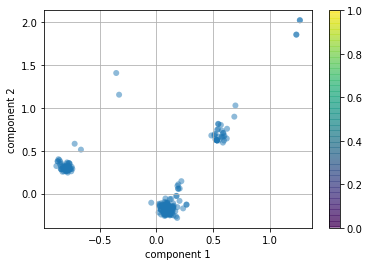

In [492]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1],
            edgecolor='none', alpha=0.5, cmap='tab10')

plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.grid()
plt.show()

In [493]:
# 원래 데이터 점들이 가지고있던 정보량 분산을 6프로정도 표현해주고 두번쟤 컴포넌트가 약 3프로를 표현해주기 때문에
# 두개의 차원으로 차수를 줄이게 되면 원래 있던 정보량에 비해서 약 11프로 정도 보존이되는거임 
pca.explained_variance_ratio_.sum()

0.9509293578052402

In [494]:
# 9프로가아니라 95프로만큼의 정보량을 보존하고싶다, 정보를 덜 잃고 싶다 한다면 이렇게 (잃는 정보량이 5프로임 이건)
pca_temp = PCA(n_components=0.95)
X_pca = pca_temp.fit_transform(df_vector)

In [495]:
# pca를 학습하면 몇개의 컴포넌트를 찾아냈는지 확인할 수있음
# 153는 212차원에 정보량을 100이라고 했을때,  95 만큼을 보존하게 하려면 153차원으로 줄이면된다 라는 뜻
pca_temp.n_components_

120

In [496]:
# 각 주성분 마다 고윳값이 0.7이상인 주성분들, 
# 누적기여율이 80% 이상이 넘어거지는 지점까지의 주성분들을 기준으로 하여 적절한 주성분 개수를 설정한다. 

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(df_pca.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,0.152376,0.065543,0.065543
pca2,0.124716,0.053646,0.119189
pca3,0.097182,0.041802,0.160991
pca4,0.066817,0.028741,0.189732
pca5,0.052390,0.022535,0.212267
...,...,...,...
pca116,0.004479,0.001927,0.943632
pca117,0.004433,0.001907,0.945539
pca118,0.004260,0.001832,0.947371
pca119,0.004180,0.001798,0.949169


In [497]:
# Instantiate the clustering model 
# n_init : 랜덤한 초기값을 몇번이나 다르게 설정해서 돌릴건지
# max_iter=300 : iteration을 반복적으로 수행하면 서 좋을 결과로 수렴하게되는데 그 횟수를 몇번 할 것인지
# verbose : 계산과정 보여줌 0,1,2 이렇게 해서 보여주는 정보의 양을 조절 할 수있음

# 15개의 클러스터를 만들기 
n_clusters = 10
kmeans = KMeans(n_clusters=n_clusters)
# kmeans = KMeans(n_clusters=4,verbose = 1)
kmeans

KMeans(n_clusters=10)

In [498]:
# 모델에 fitting 하기
kmeans.fit(df_pca)

KMeans(n_clusters=10)

In [499]:
y_kmeans = kmeans.predict(df_pca)
y_kmeans # 군집화 된 결과

array([7, 7, 7, 7, 7, 5, 1, 7, 7, 7, 7, 1, 9, 7, 7, 9, 7, 9, 0, 7, 8, 9,
       5, 7, 7, 1, 7, 9, 7, 7, 7, 1, 9, 6, 7, 7, 7, 7, 4, 9, 7, 7, 7, 9,
       1, 4, 9, 9, 7, 7, 4, 7, 7, 7, 9, 7, 7, 7, 7, 7, 9, 7, 0, 6, 7, 7,
       7, 7, 9, 8, 7, 7, 7, 7, 9, 5, 7, 7, 4, 7, 7, 7, 7, 8, 9, 9, 9, 7,
       7, 7, 9, 7, 9, 5, 9, 0, 7, 7, 4, 7, 7, 7, 7, 7, 7, 9, 7, 4, 7, 7,
       7, 5, 7, 7, 7, 7, 7, 7, 7, 7, 0, 7, 9, 7, 7, 7, 7, 9, 9, 7, 7, 9,
       9, 9, 7, 4, 7, 7, 7, 9, 7, 9, 9, 7, 9, 7, 7, 6, 7, 3, 7, 3, 7, 0,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 4, 7, 7, 7, 7, 7, 7, 7, 7, 9,
       9, 7, 7, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 5, 7, 7, 7, 7, 7, 7, 9,
       7, 7, 9, 7, 7, 7, 9, 7, 9, 7, 7, 7, 7, 7, 7, 7, 0, 6, 7, 7, 7, 7,
       7, 8, 7, 9, 4, 7, 7, 7, 7, 7, 4, 7, 7, 7, 9, 7, 7, 9, 7, 8, 9, 8,
       9, 9, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 9, 9, 7, 7, 7, 7, 9,
       7, 5, 7, 9, 7, 7, 7, 7, 7, 8, 7, 4, 4, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 6, 7, 7, 7, 8, 7, 4, 7, 7, 7, 7, 7, 7, 7,

In [500]:
# 군집의 중심
kmeans.cluster_centers_

array([[-8.63152118e-03, -1.73752584e-01, -4.71925259e-02, ...,
         5.79722227e-03,  9.50615008e-03,  2.10261225e-02],
       [ 1.09143163e-01, -2.09037724e-01, -3.29641147e-02, ...,
        -5.95220601e-03,  5.26007611e-03, -2.15691437e-03],
       [ 2.66328214e-01, -1.28964284e-01,  4.06415687e+00, ...,
        -1.35397387e-04,  3.94562391e-02,  9.61247650e-03],
       ...,
       [ 1.33402475e-01, -1.00818098e-01, -2.61149902e-02, ...,
        -1.29269214e-04, -4.40432403e-04, -7.19203383e-04],
       [ 3.99513778e-01,  6.41491060e-01,  1.09646081e-02, ...,
         8.00024016e-03, -1.34586205e-02, -7.27862022e-03],
       [-7.82258710e-01,  3.40093921e-01,  1.97449258e-02, ...,
        -5.33279325e-04,  7.69347118e-04,  2.71668988e-03]])

In [501]:
kmeans.labels_[0:8]

array([7, 7, 7, 7, 7, 5, 1, 7], dtype=int32)

In [502]:
y_kmeans[:5]

array([7, 7, 7, 7, 7], dtype=int32)

In [503]:
# 클러스터링의 성능측정
# 값이 높을 수록 좋음
kmeans.inertia_

714.5605749867078

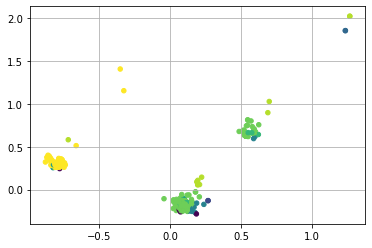

In [504]:
plt.scatter(np.array(df_pca)[:,0], np.array(df_pca)[:,1], c=y_kmeans, s=20, cmap='viridis')

centers = kmeans.cluster_centers_
# plt.scatter(centers[:,0], centers[:,1], c='black', s=100, alpha=0.5)
plt.grid()
plt.show()

In [505]:
np.array(df_pca)

array([[-0.04468633, -0.10686369, -0.16833364, ...,  0.04159921,
         0.0334833 ,  0.02281692],
       [ 0.60121171,  0.67446417, -0.06860728, ..., -0.04634058,
         0.07340178, -0.01179739],
       [ 0.09996118, -0.13535932, -0.05783938, ...,  0.03848708,
        -0.03052393, -0.06663995],
       ...,
       [-0.80380829,  0.30314192, -0.00453346, ...,  0.01925933,
         0.04702445, -0.05786001],
       [ 0.09224168, -0.17242876, -0.02225128, ...,  0.00155183,
        -0.01288987, -0.01079393],
       [ 0.09063629, -0.24908385, -0.0421314 , ...,  0.02168571,
        -0.08941064, -0.01805133]])

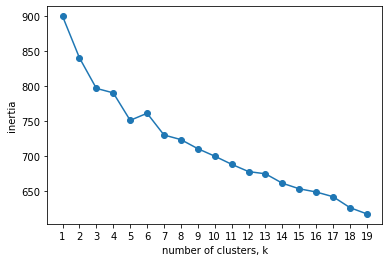

In [506]:
ks = range(1,20)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df_pca)
    inertias.append(model.inertia_)
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()


In [507]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

clustered_dic = {}
clustered_list = []
cluster_num = len(set(y_kmeans))
for idx,i in enumerate(y_kmeans):
    if i not in clustered_dic:
        clustered_dic[i] = [df['project_name'][idx]]
    else:
        clustered_dic[i].append(df['project_name'][idx])
clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

clustered_dic = sorted(clustered_dic.items(), key=lambda x: x[0])
clustered_dic

[(0,
  ['leggedrobotics/se2_navigation',
   'ShisatoYano/JuliaAutonomy',
   'vzakharchenko/remote-ctrl-gsm',
   'Rubi-Tomeu/Path-Flyer',
   'Defeator2020/ROV',
   'moorepants/eme134',
   'Roboskop/droid',
   'moorepants/bmdconf']),
 (1,
  ['layumi/AICIty-reID-2020',
   'layumi/Vehicle_reID-Collection',
   'bismex/Awesome-vehicle-re-identification',
   'lxc86739795/human_vehicle_parsing_platform',
   'lxc86739795/vehicle_reid_by_parsing']),
 (2, ['MausCD/mcd_vehiclerollover', 'MausCD/mcd_vehiclerollover']),
 (3, ['lepola/ardupilotmultiplevehicles', 'lepola/ardupilotmultiplevehicles']),
 (4,
  ['ManiAm/VENTOS_Public',
   'MOBATSim/MOBATSim',
   'skarapost/EVLib',
   'stephengold/jme-vehicles',
   'dabo248/nedc',
   'khaledghobashy/uraeus_fsae',
   'Tepic/Vehicle_Model',
   'kochlisGit/autonomous-vehicles-deep-reinforcement-learning',
   'RTOS-Team-2/htcs',
   '4hwc/4HWCAutonomousCar',
   'ericblade/genivi-vehicle-simulator',
   'MPete27/Carla-Vehicle-Simulator',
   'mcgratheg/trailer-dri

In [508]:
df_cluster = pd.DataFrame(clustered_dic,columns=['num','clusters'])
cluster_num = [len(i) for i in df_cluster['clusters']]
df_cluster['cluster_num'] = cluster_num

In [509]:
# 군집화된 패키지들은 어떤 토픽들을 가지고 있을까?

topic_clustered_list = []
for i in df_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_clustered_list.append(temp_dic[:15])
topic_clustered_list

[[('control', 8),
  ('vehicle', 8),
  ('automation', 3),
  ('navigation', 2),
  ('remote', 2),
  ('arduino', 2),
  ('engineering', 2),
  ('dynamics', 2),
  ('car', 1),
  ('ros', 1),
  ('planning', 1),
  ('mobile-robots', 1),
  ('pure-pursuit', 1),
  ('reeds-shepp', 1),
  ('se2-planning', 1)],
 [('vehicle', 5),
  ('vehicle-reid', 4),
  ('awesome', 4),
  ('pytorch', 3),
  ('veri776', 3),
  ('aicity', 2),
  ('reid', 2),
  ('parsing', 2),
  ('veri-wild', 2),
  ('paddlepaddle', 1),
  ('cityflow', 1),
  ('cvpr2020', 1),
  ('veri-776', 1),
  ('deep-learning', 1),
  ('paper', 1)],
 [('lua', 2),
  ('lua-script', 2),
  ('vehicle', 2),
  ('roll', 2),
  ('fivem', 2),
  ('fivem-script', 2),
  ('rollover', 2),
  ('fivem-roleplay', 2),
  ('vehicleroll', 2)],
 [('python', 2),
  ('vagrant', 2),
  ('vehicle', 2),
  ('multiple', 2),
  ('arducopter', 2),
  ('ardupilot', 2),
  ('arduplane', 2),
  ('sitl', 2)],
 [('simulation', 14),
  ('vehicle', 14),
  ('traffic', 2),
  ('java', 2),
  ('electric-vehicles',

In [510]:
df_cluster['top_15_topics'] = topic_clustered_list
df_cluster

,num,clusters,cluster_num,top_15_topics
0,0,"[leggedrobotics/se2_navigation, ShisatoYano/Ju...",8,"[(control, 8), (vehicle, 8), (automation, 3), ..."
1,1,"[layumi/AICIty-reID-2020, layumi/Vehicle_reID-...",5,"[(vehicle, 5), (vehicle-reid, 4), (awesome, 4)..."
2,2,"[MausCD/mcd_vehiclerollover, MausCD/mcd_vehicl...",2,"[(lua, 2), (lua-script, 2), (vehicle, 2), (rol..."
3,3,"[lepola/ardupilotmultiplevehicles, lepola/ardu...",2,"[(python, 2), (vagrant, 2), (vehicle, 2), (mul..."
4,4,"[ManiAm/VENTOS_Public, MOBATSim/MOBATSim, skar...",14,"[(simulation, 14), (vehicle, 14), (traffic, 2)..."
5,5,"[stuntrally/stuntrally, PushkinStudio/PsRealVe...",8,"[(cpp, 8), (vehicle, 8), (game, 2), (car, 2), ..."
6,6,"[thomasesmith/vw-car-net-api, emaraschio/swapi...",12,"[(api, 14), (vehicle, 12), (rest, 5), (python,..."
7,7,"[fr3ts0n/AndrOBD, pageauc/speed-camera, Seeed-...",282,"[(vehicle, 282), (python, 33), (machinelearnin..."
8,8,"[eric612/Vehicle-Detection, ozcanovunc/Driver-...",11,"[(detection, 11), (vehicle, 11), (open-source,..."
9,9,"[limiter121/esp32-obd2-emulator, smartdeviceli...",64,"[(car, 64), (vehicle, 64), (obd2, 4), (android..."


In [518]:
df_cluster.to_excel("packages_kmeans_10clusters(Vehicle).xlsx",index=False)

# DBSCAN Clustering

In [512]:
# dbscan = DBSCAN(eps = 0.5, min_samples=5)
dbscan = DBSCAN(eps = 0.5)
dbscan_cluster = dbscan.fit_predict(df_pca)
dbscan_cluster

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  1, -1,
        0, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1,  1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1,  0, -1, -1, -1, -1,  0, -1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0, -1,  0,  0, -1, -1,  0, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  0,  0, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,
       -1, -1, -1, -1,  0, -1, -1,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [513]:
# 군집화 된 패키지들을 DataFrame에 잘 들어가도록 전처리

dbscan_clustered_dic = {}
dbscan_clustered_list = []
dbscan_cluster_num = len(set(dbscan_cluster))
for idx,i in enumerate(dbscan_cluster):
    if i not in dbscan_clustered_dic:
        dbscan_clustered_dic[i] = [df['project_name'][idx]]
    else:
        dbscan_clustered_dic[i].append(df['project_name'][idx])
dbscan_clustered_dic
# 클러스터링이 된 패키지들
# 20개의 군집으로 생성

dbscan_clustered_dic = sorted(dbscan_clustered_dic.items(), key=lambda x: x[0])
dbscan_clustered_dic

[(-1,
  ['fr3ts0n/AndrOBD',
   'pageauc/speed-camera',
   'Seeed-Studio/Seeed_Arduino_CAN',
   'parkingwang/vehicle-keyboard-android',
   'cedricp/ddt4all',
   'stuntrally/stuntrally',
   'layumi/AICIty-reID-2020',
   'rnd-ash/OpenVehicleDiag',
   'atiksoftware/pubg_mobile_memory_hacking_examples',
   'rohanchandra30/Spectral-Trajectory-and-Behavior-Prediction',
   'adrenak/tork',
   'layumi/Vehicle_reID-Collection',
   'limiter121/esp32-obd2-emulator',
   'meshula/OpenSteer',
   'CaptainEven/RepNet-MDNet-VehicleReID',
   'smartdevicelink/sdl_core',
   'Nition/UnitySkidmarks',
   'PowerBroker2/ELMduino',
   'leggedrobotics/se2_navigation',
   'bimmerconnected/bimmer_connected',
   'eric612/Vehicle-Detection',
   'pratik-123/GoogleMap',
   'PushkinStudio/PsRealVehicle',
   'Jakel21/vehicle-ReID-baseline',
   'blockchain-IoT/Motoro',
   'bismex/Awesome-vehicle-re-identification',
   'jfrux/workbench',
   'kmalinich/node-bmw-client',
   'TridentMC/DavincisVessels',
   'fjp/frenet',
   'at

In [514]:
df_dbscan_cluster = pd.DataFrame(dbscan_clustered_dic,columns=['num','clusters'])
dbscan_cluster_num = [len(i) for i in df_dbscan_cluster['clusters']]
df_dbscan_cluster['cluster_num'] = dbscan_cluster_num

In [515]:
topic_dbscan_clustered_list = []
for i in df_dbscan_cluster['clusters']:
    temp_dic = {}
    for j in i:
#         print(j)
        topics = df[df['project_name']==j]['topic_keyword'].values[0]
        for i in topics:
            if len(i)==0:
                continue
            i = same_things(i)
            if i not in temp_dic:
                temp_dic[i] = 1
            else:
                temp_dic[i] += 1
    temp_dic = sorted(temp_dic.items(), key=lambda x: x[1], reverse=True)
#     print(temp_dic[:15]) # 상위 15개만 보여줌
#     print()
    topic_dbscan_clustered_list.append(temp_dic[:15])
topic_dbscan_clustered_list

[[('vehicle', 343),
  ('car', 68),
  ('python', 40),
  ('open-source', 17),
  ('simulation', 17),
  ('machinelearning', 17),
  ('android', 16),
  ('detection', 16),
  ('arduino', 15),
  ('automation', 15),
  ('api', 15),
  ('java', 14),
  ('javascript', 14),
  ('deep-learning', 12),
  ('simulator', 12)],
 [('vehicle', 51),
  ('machinelearning', 3),
  ('pawn', 2),
  ('arma3', 2),
  ('web', 2),
  ('vue', 2),
  ('sql', 2),
  ('data', 2),
  ('neural', 1),
  ('segmentation', 1),
  ('self-supervised-learning', 1),
  ('homeassistant', 1),
  ('hacs', 1),
  ('jaguar', 1),
  ('rrs', 1)],
 [('python', 8),
  ('vehicle', 7),
  ('spark', 1),
  ('mongodb', 1),
  ('pyqt5', 1),
  ('vision', 1),
  ('data', 1),
  ('sql', 1),
  ('industrial-automation', 1),
  ('agv', 1),
  ('industrial-robot', 1),
  ('dataanalysis', 1),
  ('pyqt5-desktop-application', 1),
  ('particle-filter', 1),
  ('kalman-filter', 1)],
 [('services', 7),
  ('vehicle', 7),
  ('non-life', 7),
  ('services-telematics-consistency', 1),
  (

In [516]:
df_dbscan_cluster['top_15_topics'] = topic_dbscan_clustered_list
df_dbscan_cluster

,num,clusters,cluster_num,top_15_topics
0,-1,"[fr3ts0n/AndrOBD, pageauc/speed-camera, Seeed-...",343,"[(vehicle, 343), (car, 68), (python, 40), (ope..."
1,0,"[LonglongaaaGo/CCML_Learning, msp1974/homeassi...",51,"[(vehicle, 51), (machinelearning, 3), (pawn, 2..."
2,1,[zekeriyyaa/Traffic-Data-Analysis-with-Apache-...,7,"[(python, 8), (vehicle, 7), (spark, 1), (mongo..."
3,2,"[ACMEBLOOP/pv-services-telematics-consistency,...",7,"[(services, 7), (vehicle, 7), (non-life, 7), (..."


In [517]:
df_dbscan_cluster.to_excel("packages_DBSCAN_clusters(Vehicle).xlsx",index=False)